In [29]:
import os 
import SimpleITK as sitk
import numpy as np

# binary dice segmentation metric
# This script checks if the shapes of images and ground truth labels match in a dataset.
def dice_coefficient(pred, gt):
    intersection = np.sum(pred * gt)
    return (2. * intersection) / (np.sum(pred) + np.sum(gt))

# create daraframe to store results 
import pandas as pd
# create a dataframe to store results
results = pd.DataFrame(columns=["name", "dice_coefficient"])
dataset_name = "Dataset100_Brats19"

csv_path = f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_raw/{dataset_name}/dice_coefficients.csv"
if os.path.exists(csv_path):
    results = pd.read_csv(csv_path)


images_ts =f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_raw/{dataset_name}/imagesTs"
test_gts =f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_raw/{dataset_name}/labelsTs"
predictions = f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_raw/{dataset_name}/results"

for file in os.listdir(images_ts):
    if file.endswith(".nii.gz"):
        id = file.split(".")[0].split("_")[1]
        name = "brats19_" + id

        image_path = os.path.join(images_ts, file)
        gt_path = os.path.join(test_gts, name + ".nii.gz")
        preds = os.path.join(predictions, name + ".nii.gz")

        image = sitk.ReadImage(image_path)
        gt = sitk.ReadImage(gt_path)
        preds = sitk.ReadImage(preds)
        image_array = sitk.GetArrayFromImage(image)
        gt_array = sitk.GetArrayFromImage(gt)
        preds_array = sitk.GetArrayFromImage(preds)

        if image_array.shape != gt_array.shape:
            print(f"Shape mismatch for {file}: image shape {image_array.shape}, gt shape {gt_array.shape}")
        else:
            print(f"Shapes match for {file}: {image_array.shape}")
            dice = dice_coefficient(preds_array, gt_array)
            print(f"Dice coefficient for {file}: {dice}")
            results = pd.concat([results, pd.DataFrame([{"name": name, "dice_coefficient": dice}])], ignore_index=True)

mean_dice = results["dice_coefficient"].mean()
# Save results to a CSV file
results.to_csv(csv_path, index=False)

# save mean dice coefficient to a new CSV file
mean_dice_df = pd.DataFrame({"mean_dice_coefficient": [mean_dice]})
mean_dice_csv_path = f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_raw/{dataset_name}/mean_dice_coefficient.csv"
mean_dice_df.to_csv(mean_dice_csv_path, index=False)

# Print the results
print("Results saved to dice_coefficients.csv")
    

Shapes match for brats19_334_0000.nii.gz: (138, 170, 133)
Dice coefficient for brats19_334_0000.nii.gz: 0.9432999914992491
Shapes match for brats19_289_0000.nii.gz: (139, 180, 131)
Dice coefficient for brats19_289_0000.nii.gz: 0.9465534535314842
Shapes match for brats19_297_0000.nii.gz: (138, 162, 127)
Dice coefficient for brats19_297_0000.nii.gz: 0.9692799267167581
Shapes match for brats19_312_0000.nii.gz: (138, 163, 135)
Dice coefficient for brats19_312_0000.nii.gz: 0.9700991796253214
Shapes match for brats19_323_0000.nii.gz: (138, 172, 145)
Dice coefficient for brats19_323_0000.nii.gz: 0.9617396194582435


/tmp/ipykernel_1216115/500929577.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{"name": name, "dice_coefficient": dice}])], ignore_index=True)


Shapes match for brats19_299_0000.nii.gz: (133, 168, 139)
Dice coefficient for brats19_299_0000.nii.gz: 0.9223031625169665
Shapes match for brats19_286_0000.nii.gz: (136, 171, 132)
Dice coefficient for brats19_286_0000.nii.gz: 0.7396844866946063
Shapes match for brats19_277_0000.nii.gz: (139, 172, 129)
Dice coefficient for brats19_277_0000.nii.gz: 0.8289827801238431
Shapes match for brats19_302_0000.nii.gz: (138, 175, 137)
Dice coefficient for brats19_302_0000.nii.gz: 0.937173186760163
Shapes match for brats19_330_0000.nii.gz: (137, 158, 141)
Dice coefficient for brats19_330_0000.nii.gz: 0.9229063666285652
Shapes match for brats19_310_0000.nii.gz: (140, 167, 125)
Dice coefficient for brats19_310_0000.nii.gz: 0.9519919567676259
Shapes match for brats19_311_0000.nii.gz: (135, 164, 145)
Dice coefficient for brats19_311_0000.nii.gz: 0.7445523236109173
Shapes match for brats19_318_0000.nii.gz: (140, 164, 135)
Dice coefficient for brats19_318_0000.nii.gz: 0.9625124638866873
Shapes match for 

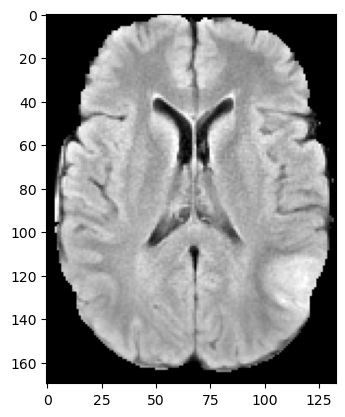

In [13]:
from matplotlib import pyplot as plt
plt.imshow(image_array[80, :, :], cmap='gray')


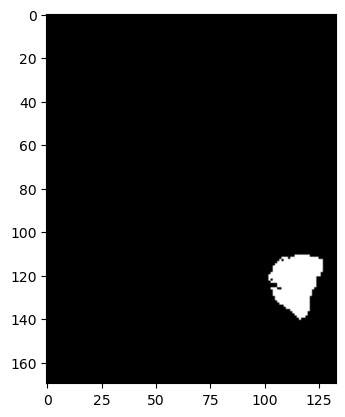

In [16]:
from matplotlib import pyplot as plt
plt.imshow(gt_array[80, :, :], cmap='gray')

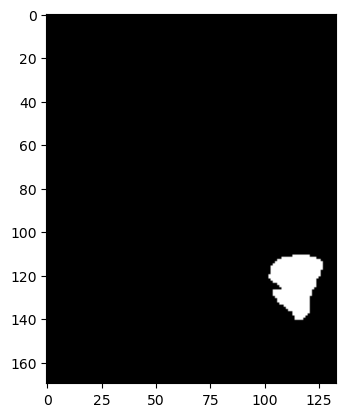

In [24]:
from matplotlib import pyplot as plt
plt.imshow(preds_array[80, :, :], cmap='gray')

# Results that saved in nnunet_results 

In [1]:
import os 
import SimpleITK as sitk
import numpy as np

from surface_distance import compute_surface_distances, compute_average_surface_distance, compute_robust_hausdorff

def compute_hd95(pred, gt, spacing):
    surface_distances = compute_surface_distances(gt, pred, spacing)
    return compute_robust_hausdorff(surface_distances, 95)

def compute_assd(pred, gt, spacing):
    surface_distances = compute_surface_distances(gt, pred, spacing)
    assd = compute_average_surface_distance(surface_distances)
    return np.mean(assd)  # mean of symmetric distances

def dice_coefficient(pred, gt):
    intersection = np.sum(pred * gt)
    return (2. * intersection) / (np.sum(pred) + np.sum(gt))


# create daraframe to store results 
import pandas as pd
# create a dataframe to store results
results = pd.DataFrame(columns=["name", "dice_coefficient"])
dataset_name = "Dataset100_Brats19"
best_or_final = "final"  #  "best" or 'final
model_name = "nnUNetTrainerCoBoundarySeg5__nnUNetPlans__3d_fullres__perc0.05-normalizedweights" 

csv_path = f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_results/{dataset_name}/{model_name}/dice_coefficients_{best_or_final}.csv"
if os.path.exists(csv_path):
    results = pd.read_csv(csv_path)

images_ts =f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_raw/{dataset_name}/imagesTs"
test_gts =f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_raw/{dataset_name}/labelsTs"
predictions = f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_results/{dataset_name}/{model_name}/results_{best_or_final}"

for file in os.listdir(images_ts):
    if file.endswith(".nii.gz"):
        id = file.split(".")[0].split("_")[1]
        name = "brats19_" + id

        image_path = os.path.join(images_ts, file)
        gt_path = os.path.join(test_gts, name + ".nii.gz")
        pred_path = os.path.join(predictions, name + ".nii.gz")

        image = sitk.ReadImage(image_path)
        gt = sitk.ReadImage(gt_path)
        pred = sitk.ReadImage(pred_path)

        image_array = sitk.GetArrayFromImage(image)
        gt_array = sitk.GetArrayFromImage(gt).astype(np.uint8)
        pred_array = sitk.GetArrayFromImage(pred).astype(np.uint8)

        if image_array.shape != gt_array.shape:
            print(f"Shape mismatch for {file}: image shape {image_array.shape}, gt shape {gt_array.shape}")
            continue

        spacing = gt.GetSpacing()[::-1]  # reverse due to sitk indexing (z, y, x)

        dice = dice_coefficient(pred_array, gt_array)
        hd95 = compute_hd95(pred_array.astype(bool), gt_array.astype(bool), spacing)
        assd = compute_assd(pred_array.astype(bool), gt_array.astype(bool), spacing)

        results = pd.concat([results, pd.DataFrame([{
            "name": name,
            "dice_coefficient": dice,
            "hd95": hd95,
            "assd": assd
        }])], ignore_index=True)

mean_dice = results["dice_coefficient"].mean()
mean_hd = results["hd95"].mean()
mean_assd = results["assd"].mean()

# Save results
results.to_csv(csv_path, index=False)

# Save mean metrics
mean_metrics_df = pd.DataFrame({
    "mean_dice_coefficient": [mean_dice],
    "mean_hd95": [mean_hd],
    "mean_assd": [mean_assd]
})
mean_dice_csv_path = os.path.join(
    f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_results/{dataset_name}/{model_name}",
    f"mean_metrics_{best_or_final}.csv"
)
mean_metrics_df.to_csv(mean_dice_csv_path, index=False)

/tmp/ipykernel_45196/380868028.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{


In [21]:
img_path = '/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_results/Dataset100_Brats19/nnUNetTrainerCoBoundarySeg2__nnUNetPlans__3d_fullres__perc0.05/results_best/brats19_334.nii.gz'
gt_path = '/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_raw/Dataset100_Brats19/labelsTs/brats19_334.nii.gz'
pred_path ='/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_results/Dataset100_Brats19/nnUNetTrainerCoBoundarySeg2__nnUNetPlans__3d_fullres__perc0.05/results_best/brats19_334.nii.gz'

id = '334'
name = "brats19_" + id

image = sitk.ReadImage(img_path)
gt = sitk.ReadImage(gt_path)
pred = sitk.ReadImage(pred_path)

image_array = sitk.GetArrayFromImage(image)
gt_array = sitk.GetArrayFromImage(gt).astype(np.uint8)
pred_array = sitk.GetArrayFromImage(pred).astype(np.uint8)

spacing = gt.GetSpacing()[::-1]  # reverse due to sitk indexing (z, y, x)

dice = dice_coefficient(pred_array, gt_array)
hd95 = compute_hd95(pred_array.astype(bool), gt_array.astype(bool), spacing)
assd = compute_assd(pred_array.astype(bool), gt_array.astype(bool), spacing)

print(f"Dice coefficient for {name}: {dice}")
print(f"HD95 for {name}: {hd95}")
print(f"ASSD for {name}: {assd}")

Dice coefficient for brats19_334: 0.9344827586206896
HD95 for brats19_334: 1.4142135623730951
ASSD for brats19_334: 0.5214449978788505


# Evaluation of the 2 class problem 

In [1]:
import os 
import SimpleITK as sitk
import numpy as np

from surface_distance import compute_surface_distances, compute_average_surface_distance, compute_robust_hausdorff

def compute_hd95(pred, gt, spacing):
    surface_distances = compute_surface_distances(gt, pred, spacing)
    return compute_robust_hausdorff(surface_distances, 95)

def compute_assd(pred, gt, spacing):
    surface_distances = compute_surface_distances(gt, pred, spacing)
    assd = compute_average_surface_distance(surface_distances)
    return np.mean(assd)  # mean of symmetric distances

def dice_coefficient(pred, gt):
    intersection = np.sum(pred * gt)
    return (2. * intersection) / (np.sum(pred) + np.sum(gt))


# create daraframe to store results 
import pandas as pd
# create a dataframe to store results
results = pd.DataFrame(columns=["name", "dice_coefficient"])
dataset_name = "Dataset100_Brats19"
best_or_final = "best"  #  "best" or 'final
model_name = "nnUNetTrainerCoBoundarySeg5__nnUNetPlans__3d_fullres__perc0.05-normalizedweights" 

csv_path = f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_results/{dataset_name}/{model_name}/dice_coefficients_{best_or_final}.csv"
if os.path.exists(csv_path):
    results = pd.read_csv(csv_path)

images_ts =f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_raw/{dataset_name}/imagesTs"
test_gts =f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_raw/{dataset_name}/labelsTs"
predictions = f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_results/{dataset_name}/{model_name}/results_{best_or_final}"

for file in os.listdir(images_ts):
    if file.endswith(".nii.gz"):
        id = file.split(".")[0].split("_")[1]
        name = "brats19_" + id

        image_path = os.path.join(images_ts, file)
        gt_path = os.path.join(test_gts, name + ".nii.gz")
        pred_path = os.path.join(predictions, name + ".nii.gz")

        image = sitk.ReadImage(image_path)
        gt = sitk.ReadImage(gt_path)
        pred = sitk.ReadImage(pred_path)

        image_array = sitk.GetArrayFromImage(image)
        gt_array = sitk.GetArrayFromImage(gt).astype(np.uint8)
        pred_array = sitk.GetArrayFromImage(pred).astype(np.uint8)

        # in the pred_array the number of classes are 2. 
        # combine these two classes into one binary mask
        pred_array = (pred_array > 0).astype(np.uint8)  # convert to binary mask

        if image_array.shape != gt_array.shape:
            print(f"Shape mismatch for {file}: image shape {image_array.shape}, gt shape {gt_array.shape}")
            continue

        spacing = gt.GetSpacing()[::-1]  # reverse due to sitk indexing (z, y, x)

        dice = dice_coefficient(pred_array, gt_array)
        hd95 = compute_hd95(pred_array.astype(bool), gt_array.astype(bool), spacing)
        assd = compute_assd(pred_array.astype(bool), gt_array.astype(bool), spacing)

        results = pd.concat([results, pd.DataFrame([{
            "name": name,
            "dice_coefficient": dice,
            "hd95": hd95,
            "assd": assd
        }])], ignore_index=True)

mean_dice = results["dice_coefficient"].mean()
mean_hd = results["hd95"].mean()
mean_assd = results["assd"].mean()

# Save results
results.to_csv(csv_path, index=False)

# Save mean metrics
mean_metrics_df = pd.DataFrame({
    "mean_dice_coefficient": [mean_dice],
    "mean_hd95": [mean_hd],
    "mean_assd": [mean_assd]
})
mean_dice_csv_path = os.path.join(
    f"/home/cansu/SSLCAT/SSLesion/code/nnUNet/data/nnUNet_results/{dataset_name}/{model_name}",
    f"mean_metrics_{best_or_final}.csv"
)
mean_metrics_df.to_csv(mean_dice_csv_path, index=False)

/tmp/ipykernel_3439801/2346342240.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{
